In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [28]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print ("X_train shape",x_train.shape)
print("Y_train shape",y_train.shape)
print("X_test shape",x_test.shape)
print("Y_test shape",y_test.shape)
x_test[0][0][0]

X_train shape (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


0

In [29]:
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /=255
X_test /=255
print("X Training matrix shape",X_train.shape)
print("X Testing matrix shape",X_test.shape)


X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [30]:
nb_classes = 10
Y_train = to_categorical(y_train,nb_classes)
Y_test = to_categorical(y_test,nb_classes)
print("Y training matrix shape",Y_train.shape)
print("Y testing matrix shape",Y_test.shape)

Y training matrix shape (60000, 10)
Y testing matrix shape (10000, 10)


In [31]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train,Y_train,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8791 - loss: 0.4150
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9744 - loss: 0.0847
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9844 - loss: 0.0495
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9906 - loss: 0.0312
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9914 - loss: 0.0262
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9938 - loss: 0.0194
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9941 - loss: 0.0174
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9939 - loss: 0.0173
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9955 - loss: 0.0135
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9968 - loss: 0.0092


In [33]:
score = model.evaluate(X_test,Y_test)
print("Test accuracy:",score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9783 - loss: 0.0921
Test accuracy: 0.98089998960495


In [34]:
predicted_classes = np.argmax(model.predict(X_test),axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


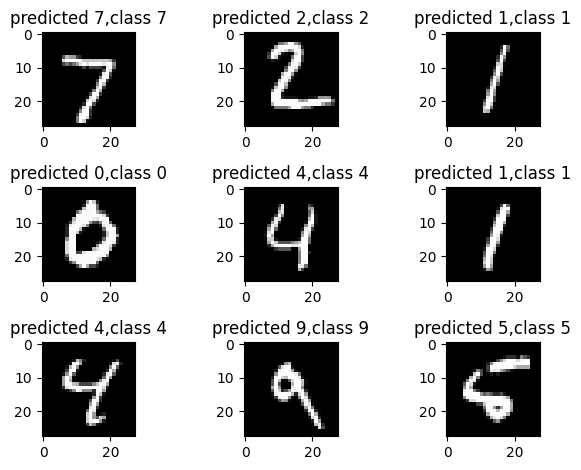

In [35]:
plt.figure()
for i,correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28),cmap="gray",interpolation="none")
    plt.title("predicted {},class {}".format(predicted_classes[correct],y_test[correct]))
plt.tight_layout()
    

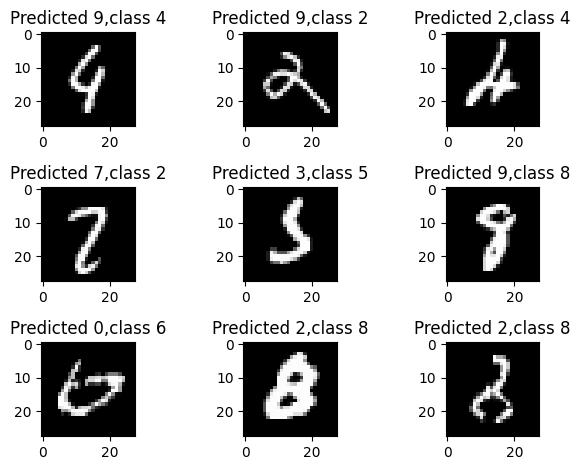

In [37]:
plt.figure()
for i,incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28),cmap='gray',interpolation='none')
    plt.title("Predicted {},class {}".format(predicted_classes[incorrect],y_test[incorrect]))
plt.tight_layout()